## 0. Computer vision libaries in PyTorch
* [`torchvision`](https://www.learnpytorch.io/03_pytorch_computer_vision/) - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.9.0+cpu
0.24.0+cpu


## 1. Getting a dataset

The dataset we'll be using is FashionMNIST from torchvision.datasets - https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST

In [2]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # do we want the training dataset?
    download=True, # do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(), # 把圖像換成tensor
    target_transform=None
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
# Check out the shape of Image
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Label : {label}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Label : 9


### 1.1 Check input and output shapes of data

In [9]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


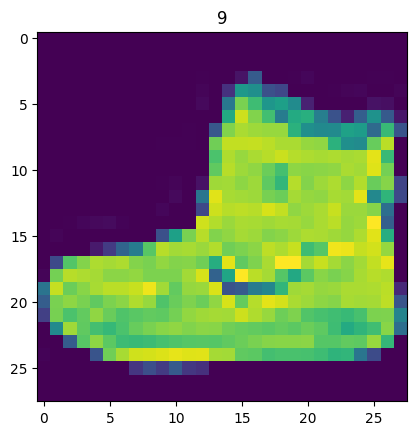

In [10]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # 因為imshow預期輸入只有(高度, 寬度)或是(高度, 寬度, 顏色通道)
plt.title(label);
# image

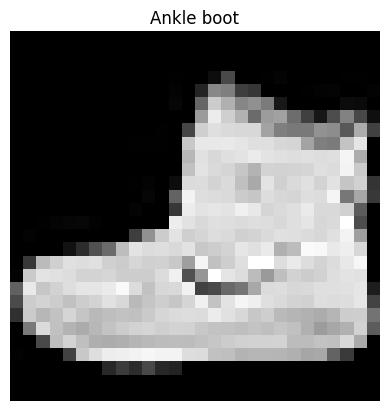

In [11]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

- `size=[1]`: 表示我們要生成一個包含一個元素的張量。 所以，這部分會生成一個介於 0 和 len(train_data) 之間（不包含 len(train_data)）的隨機整數，並將其包裝在一個 PyTorch 張量中（例如 tensor([12345])）

- `.item()`: 這是 PyTorch 張量的一個方法，用於從只包含一個元素的張量中提取出該元素的標準 Python 值（例如，將 tensor([12345]) 轉換為整數 12345）

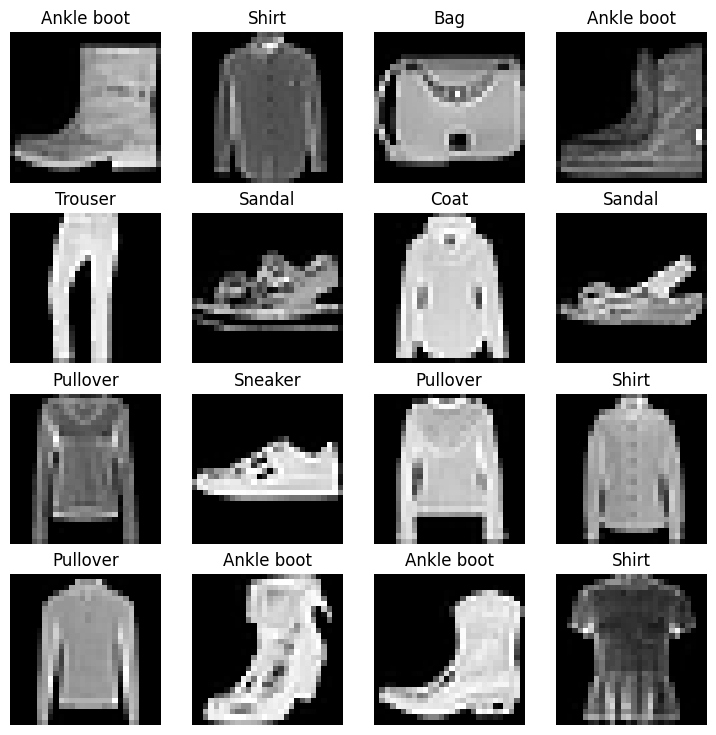

In [12]:
 # Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

In [13]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches (or mini-batches).

Why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to update its gradients per epoch.

For more on mini-batches, see here: https://youtu.be/l4lSUAcvHFs

In [14]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f2be2608740>,
 <torch.utils.data.dataloader.DataLoader at 0x7f2be260b800>)

In [15]:
# Let's check out what what we've created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f2be2608740>, <torch.utils.data.dataloader.DataLoader object at 0x7f2be260b800>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [16]:
60000/32, 10000/32

(1875.0, 312.5)

DataLoader 物件是一個迭代器 (iterator)

`next(iter(train_dataloader))`:
    這適用於 DataLoader 物件。
    它會取出 train_dataloader 所產生的第一個批次 (batch) 的資料，這個批次包含了 BATCH_SIZE 數量（在你例子中是 32）的圖片和它們對應的標籤。
    DataLoader 的設計目的就是為了將多個單獨的資料點組合成批次，並提供有效的迭代方式。

In [17]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

`size=[1]`: 這表示生成的結果是一個包含一個元素的 PyTorch 張量

`.item()`: 會將這個單一元素從 PyTorch 張量轉換成標準的 Python 數字（例如，將 tensor([15]) 轉換為整數 15）

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


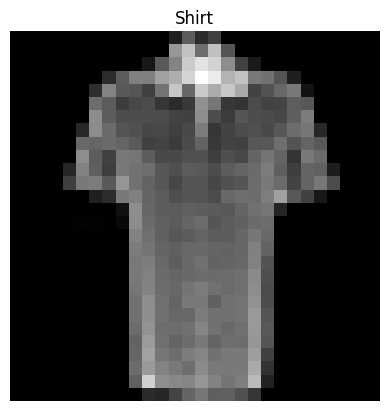

In [18]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a basline model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary.

In [19]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


nn.Flatten() 預設會將除了第一個維度（start_dim=1）之外的所有維度展平

In [20]:
import torch
from torch import nn

# 創建一個 Flatten 層，使用預設參數 (start_dim=1, end_dim=-1)
flatten_default = nn.Flatten()

print("=== 範例 1: 2D 輸入 (Batch, Features) ===")
# 模擬一個批次數據，已經是 2D
input_2d = torch.rand(4, 5) # 4 個樣本，每個有 5 個特徵
print(f"原始形狀: {input_2d.shape}")
output_2d = flatten_default(input_2d)
print(f"展平後形狀: {output_2d.shape}\n")
# 這裡因為已經是 2D，所以沒有更多維度可以展平，形狀不變。

print("=== 範例 2: 3D 輸入 (Batch, Channels, Features) ===")
# 模擬一個批次數據，每個樣本有 3 個通道，每個通道有 5 個特徵
input_3d = torch.rand(2, 3, 5) # 2 個樣本，3 個通道，5 個特徵
print(f"原始形狀: {input_3d.shape}")
output_3d = flatten_default(input_3d)
print(f"展平後形狀: {output_3d.shape}\n")
# (2, 3*5) -> (2, 15)  第一維度保留，後續維度 3 和 5 合併為 15

print("=== 範例 3: 4D 輸入 (Batch, Channels, Height, Width) ===")
# 模擬 RGB 圖片 (Batch, Channels, Height, Width)
input_4d = torch.rand(1, 3, 2, 2) # 1 張圖片，3 個通道，2x2 像素
print(f"原始形狀: {input_4d.shape}")
output_4d = flatten_default(input_4d)
print(f"展平後形狀: {output_4d.shape}\n")
# (1, 3*2*2) -> (1, 12)  第一維度保留，後續維度 3, 2, 2 合併為 12

print("=== 範例 4: 5D 輸入 (Batch, VideoFrames, Channels, Height, Width) ===")
# 模擬影片幀數據
input_5d = torch.rand(2, 5, 3, 2, 2) # 2 個影片，每個有 5 幀，每幀 3 個通道，2x2 像素
print(f"原始形狀: {input_5d.shape}")
output_5d = flatten_default(input_5d)
print(f"展平後形狀: {output_5d.shape}\n")
# (2, 5*3*2*2) -> (2, 60)  第一維度保留，後續維度 5, 3, 2, 2 合併為 60

=== 範例 1: 2D 輸入 (Batch, Features) ===
原始形狀: torch.Size([4, 5])
展平後形狀: torch.Size([4, 5])

=== 範例 2: 3D 輸入 (Batch, Channels, Features) ===
原始形狀: torch.Size([2, 3, 5])
展平後形狀: torch.Size([2, 15])

=== 範例 3: 4D 輸入 (Batch, Channels, Height, Width) ===
原始形狀: torch.Size([1, 3, 2, 2])
展平後形狀: torch.Size([1, 12])

=== 範例 4: 5D 輸入 (Batch, VideoFrames, Channels, Height, Width) ===
原始形狀: torch.Size([2, 5, 3, 2, 2])
展平後形狀: torch.Size([2, 60])



the 'in_features=784' correctly aligns with the last dimension of the input,

regardless of whether the batch size is 1 or 32.

In [21]:
import torch
from torch import nn

# Create a linear layer expecting 784 input features and outputting 10 features
linear_layer = nn.Linear(in_features=784, out_features=10)

# Scenario 1: Single input (batch size 1)
single_input = torch.rand(1, 784) # Shape: [batch_size, features]
print(f"Shape of single_input: {single_input.shape}")
output_single = linear_layer(single_input)
print(f"Shape after linear layer (single input): {output_single.shape}\n")

# Scenario 2: Batch of 32 inputs
batch_input = torch.rand(32, 784) # Shape: [batch_size, features]
print(f"Shape of batch_input: {batch_input.shape}")
output_batch = linear_layer(batch_input)
print(f"Shape after linear layer (batch input): {output_batch.shape}")

# As you can see, the 'in_features=784' correctly aligns with the last dimension of the input,
# regardless of whether the batch size is 1 or 32.

Shape of single_input: torch.Size([1, 784])
Shape after linear layer (single input): torch.Size([1, 10])

Shape of batch_input: torch.Size([32, 784])
Shape after linear layer (batch input): torch.Size([32, 10])


> `nn.Linear` 的設計是針對輸入的最後一個維度進行線性變換。它的期望輸入形狀是 (*, in_features)，其中 * 可以是任意數量的維度。當它接收到一個輸入張量時，它會對輸入張量的最後一個維度進行 in_features 到 out_features 的轉換，而所有在最後一個維度之前的維度（包括第一個維度，通常代表批次大小）都會被自動地保留下來，並傳遞到輸出張量



In [22]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [23]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=28*28, # this is 28*28
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [24]:
dummy_x = torch.rand([1, 1, 28, 28])    #
print(dummy_x.shape)
model_0(dummy_x), model_0(dummy_x).shape

torch.Size([1, 1, 28, 28])


(tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
          -0.1004,  0.0157]], grad_fn=<AddmmBackward0>),
 torch.Size([1, 10]))

In [25]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (stochastic隨機 gradient descent)
* Evaluation metric - since we're working on a classification problem, let's use accruacy as our evaluation metric

In [26]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download...


In [27]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creating a function to time our experiments

Machine learning is very experimental.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs

In [28]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [29]:
start_time = timer()
# some code...
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


3.5773000035987934e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all (for fun).

**Note:** Because we are computing on *batches*, the optimizer will update the model's parameters once *per batch* rather than once per epoch.

In [30]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(24)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")

    ### Training
    train_loss = 0

    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()

        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step (update the model's parameters once *per batch*)
        optimizer.step()

        # Print out what's happening
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X_test)

            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y_test)

            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1)) # test_pred只是logit，要找到最大值的index

        # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)

        # Calculate the test acc average per batch
        test_acc /= len(test_dataloader)

    # Print out what's happening
    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

    # Calculate training time
    train_time_end_on_cpu = timer()
    total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                                end=train_time_end_on_cpu,
                                                device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5877 | Test loss: 0.5405, Test acc: 79.4429
Train time on cpu: 12.542 seconds
Epoch: 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4756 | Test loss: 0.4845, Test acc: 82.7576
Train time on cpu: 24.935 seconds
Epoch: 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4541 | Test loss: 0.4873, Test acc: 82.4780
Train time on cpu: 36.180 seconds


In [31]:
# torch.manual_seed(42)
# epochs = 3
# train_time_start_on_cpu = timer()

# for epoch in tqdm(range(epochs)):
#     print(f"Epoch: {epoch}\n------")
#     train_loss = 0
#     for batch, (X, y) in enumerate(train_dataloader):
#         model_0.train()
#         y_pred = model_0(X)
#         loss = loss_fn(y_pred, y)
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         train_loss += loss
#         if batch % 400 == 0:
#             print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

#     train_loss /= len(train_dataloader)

#     model_0.eval()
#     with torch.inference_mode():
#         test_loss = 0
#         test_acc = 0
#         for X_test, y_test in test_dataloader:
#             y_pred = model_0(X_test)
#             loss = loss_fn(y_pred, y_test)
#             acc = accuracy_fn(y_pred=y_pred.argmax(dim=1), y_true=y_test)
#             test_loss += loss
#             test_acc += acc

#         test_loss /= len(test_dataloader)
#         test_acc /= len(test_dataloader)

#         print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

# # Calculate training time
# train_time_end_on_cpu = timer()
# total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
#                                             end=train_time_end_on_cpu,
#                                             device=str(next(model_0.parameters()).device))

## 4. Make predictions and get Model 0 results

In [32]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4872843027114868,
 'model_acc': 82.47803514376997}

## 5. Setup device agnostic-code (for using a GPU if there is one)


In [33]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [34]:
torch.cuda.is_available()

False

In [35]:
# Setup device-agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 6. Model 1: Building a better model with non-linearity

We learned about the power of non-linearity in notebook 02 - https://www.learnpytorch.io/02_pytorch_classification/#6-the-missing-piece-non-linearity

In [36]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten inputs into a single vector
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [37]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # this is the output of the flatten after our 28*28 image goes in
                              hidden_units=10,
                              output_shape=len(class_names)).to(device) # send to the GPU if it's available
next(model_1.parameters()).device

device(type='cpu')

### 6.1 Setup loss, optimizer and evaluation metrics

In [38]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # measure how wrong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(), # tries to update our model's parameters to reduce the loss
                            lr=0.1)

### 6.2 Functionizing training and evaluation/testing loops

Let's create a function for:
* training loop - `train_step()`
* testing loop - `test_step()`

In [39]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    """Performs a training with model trying to learn on data_loader."""

    train_loss, train_acc = 0, 0
    model.train()

    for batch, (X, y) in enumerate(data_loader):
        # Put data on target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss and accuracy (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. optimizer step
        optimizer.step()


    train_loss /= len(data_loader)
    train_acc /= len(data_loader)

    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")


In [40]:
 def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    """Performs a testing loop step on model going over data_loader."""
    test_loss, test_acc = 0, 0 # Corrected initialization
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Put data on target device
            X, y = X.to(device), y.to(device)

            test_pred = model(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")


**InferenceMode** 的保護機制： torch.inference_mode() 旨在優化推論階段的性能和記憶體使用。在這種模式下，PyTorch 對於張量的某些行為會有更嚴格的限制。特別是，它不允許對在 inference_mode 中創建或追蹤的張量，在其外部進行原地修改（例如 test_loss /= len(data_loader) 這種操作）。這是為了防止潛在的錯誤行為，例如意外地影響到不該追蹤梯度的張量，或者導致不明確的狀態。

In [41]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----------")
    train_step(model=model_1,
                data_loader=train_dataloader,
                loss_fn=loss_fn,
                optimizer=optimizer,
                accuracy_fn=accuracy_fn,
                device=device)
    test_step(model=model_1,
                data_loader=test_dataloader,
                loss_fn=loss_fn,
                accuracy_fn=accuracy_fn,
                device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
Train loss: 1.09199 | Train acc: 61.34%
Test loss: 0.95636 | Test acc: 65.00%

Epoch: 1
----------
Train loss: 0.78101 | Train acc: 71.93%
Test loss: 0.72227 | Test acc: 73.91%

Epoch: 2
----------
Train loss: 0.67027 | Train acc: 75.94%
Test loss: 0.68500 | Test acc: 75.02%

Train time on cpu: 33.705 seconds


In [42]:
# Compare
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4872843027114868,
 'model_acc': 82.47803514376997}

In [43]:
# Train time on CPU
total_train_time_model_0

36.18018982000001

> **Note:** Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than GPU.
>
> Why is this?
>
> 1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU.
> 2. The hardware you're using has a better CPU in terms compute capability than the GPU.
>
> For more on how to make your models compute faster, see here: https://horace.io/brrr_intro.html

In [44]:
# Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

In [45]:
# 修改eval_model()
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make our data device agnostic
      X, y = X.to(device), y.to(device)
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

In [46]:
# Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

 ## Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also known ConvNets.

CNN's are known for their capabilities to find patterns in visual data.

To find out what's happening inside a CNN, see this website: https://poloclub.github.io/cnn-explainer/

In [47]:
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVGG
    model from CNN explainer website.
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            # Create a conv layer - https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
            nn.Conv2d(in_channels=input_shape,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1), # values we can set ourselves in our NN's are called hyperparameters
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,   # 步幅
                    padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, # there's a trick to calculating this...
                    out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(f"Output shape of conv_block_1: {x.shape}")
        x = self.conv_block_2(x)
        # print(f"Output shape of conv_block_2: {x.shape}")
        x = self.classifier(x)
        # print(f"Output shape of classifier: {x.shape}")
        return x

In [48]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [49]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [50]:
# Pass image through model
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

### 7.1 Stepping through `nn.Conv2d()`

See the documentation for `nn.Conv2d()` here - https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [51]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [52]:
torch.manual_seed(42)
# Create a sinlge conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3, 3),
                       stride=1,
                       padding=0)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 62, 62])

In [53]:
test_image.unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

### 7.2 Stepping through `nn.MaxPool2d()`

https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html

In [54]:
test_image.shape

torch.Size([3, 64, 64])

In [55]:
# Print out original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [56]:
torch.manual_seed(42)
# Create a random tesnor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"\nRandom tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")


Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss function and optimizer for `model_2`

In [57]:
# Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### 7.4 Training and testing `model_2` using our training and test functions

In [58]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    train_step(
        model=model_2,
        data_loader=train_dataloader, # Changed from test_dataloader to train_dataloader
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )

    test_step(
        model=model_2,
        data_loader=test_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.59518 | Train acc: 78.38%
Test loss: 0.39500 | Test acc: 85.99%

Epoch: 1
-------
Train loss: 0.36536 | Train acc: 86.90%
Test loss: 0.35244 | Test acc: 86.91%

Epoch: 2
-------
Train loss: 0.32588 | Train acc: 88.13%
Test loss: 0.32719 | Test acc: 88.07%

Train time on cpu: 181.012 seconds


In [59]:
# Get model_2 results
model_2_results = eval_model(
     model=model_2,
     data_loader=test_dataloader,
     loss_fn=loss_fn,
     accuracy_fn=accuracy_fn,
     device=device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

## 8. Compare model results and training time

In [60]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.487284,82.478035
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.327190,88.069089


In [61]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.487284,82.478035,36.180190
1,FashionMNISTModelV1,0.685001,75.019968,33.705041
2,FashionMNISTModelV2,0.327190,88.069089,181.011872


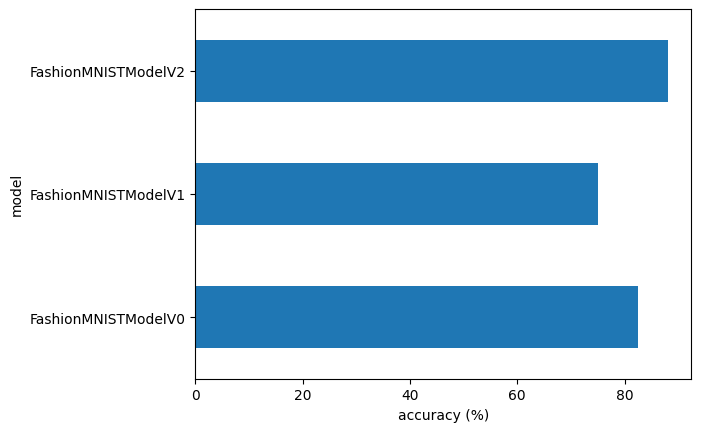

In [62]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

## 9. Make and evaluate random predictions with best model

In [63]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.to(device)

    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            sample = sample.unsqueeze(dim=0).to(device)

            # Forward pass (model outputs raw logits)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())  # 因為matlab要在CPU

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [64]:
import torch

# 假設有三張圖片的預測機率
pred_prob_1 = torch.tensor([0.1, 0.2, 0.7]) # 第一張圖片對3個類別的機率
pred_prob_2 = torch.tensor([0.8, 0.1, 0.1]) # 第二張圖片對3個類別的機率
pred_prob_3 = torch.tensor([0.3, 0.5, 0.2]) # 第三張圖片對3個類別的機率

# 將這些單一圖片的機率張量放入一個列表中
pred_probs_list = [pred_prob_1, pred_prob_2, pred_prob_3]

print(f"列表中第一個張量的形狀: {pred_probs_list[0].shape}")
print(f"列表長度: {len(pred_probs_list)}")
print(f"\n列表內容:\n{pred_probs_list}")

# 使用 torch.stack 將列表中的張量堆疊起來
stacked_preds = torch.stack(pred_probs_list)

print(f"\n堆疊後張量的形狀: {stacked_preds.shape}")
print(f"堆疊後張量內容:\n{stacked_preds}")

列表中第一個張量的形狀: torch.Size([3])
列表長度: 3

列表內容:
[tensor([0.1000, 0.2000, 0.7000]), tensor([0.8000, 0.1000, 0.1000]), tensor([0.3000, 0.5000, 0.2000])]

堆疊後張量的形狀: torch.Size([3, 3])
堆疊後張量內容:
tensor([[0.1000, 0.2000, 0.7000],
        [0.8000, 0.1000, 0.1000],
        [0.3000, 0.5000, 0.2000]])


你會看到，原本每個形狀是 `[3]` 的張量，被 `torch.stack()` 後，形成了一個新的張量，形狀變成了 `[3, 3]`。新的第一個維度 `3` 代表了原列表中有三個張量，第二個維度 `3` 則保留了每個原始張量的維度。

test_data為原始資料集，沒有分batches

In [65]:
img, label = test_data[0]
img.shape, label, type(test_data)

(torch.Size([1, 28, 28]), 9, torchvision.datasets.mnist.FashionMNIST)

In [66]:
import random
# random.seed(42)
test_samples = []
test_labels = []

# 從 list(test_data)中隨機選取 9 個不重複 的元素。
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Ankle boot')

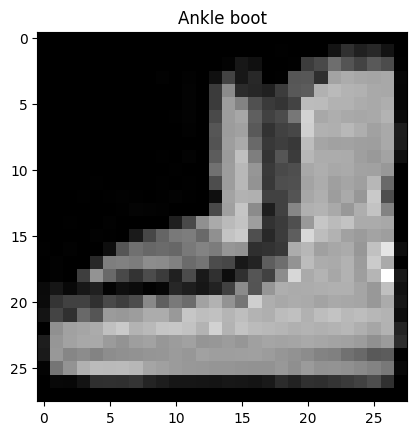

In [67]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [68]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first two prediction probabilities
pred_probs[0]

tensor([1.3416e-04, 2.0962e-05, 6.2399e-05, 3.5642e-04, 6.7096e-05, 7.5740e-01,
        1.0804e-03, 1.6763e-02, 8.8958e-03, 2.1522e-01])

In [69]:
pred_probs[0].argmax()

tensor(5)

In [70]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 3, 9, 0, 2, 0, 0, 3, 6])

In [71]:
test_labels

[9, 3, 9, 0, 2, 0, 0, 3, 0]

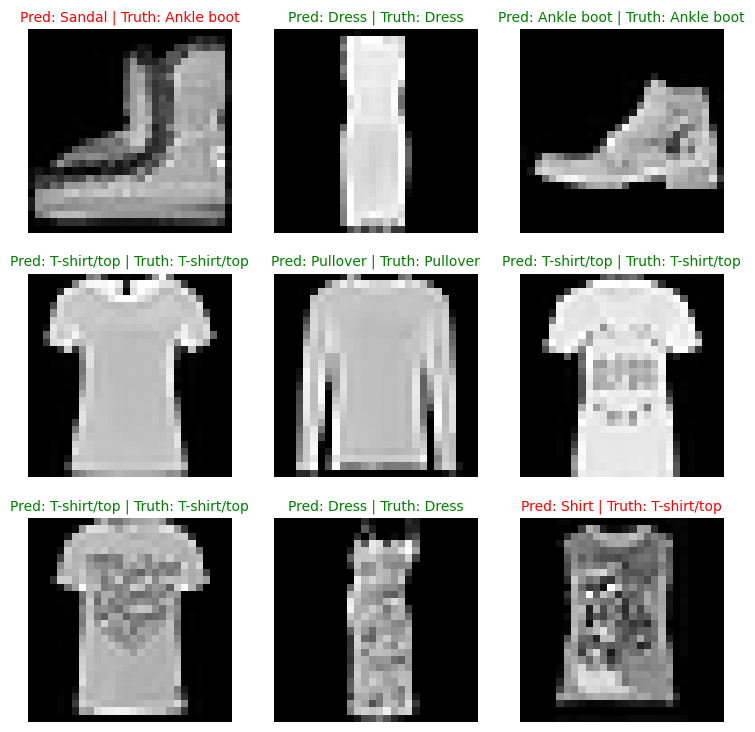

In [72]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False);

## 10. Making a confusion matrix for further prediction evaluation

A confusion matrix is a fantastic way of evaluating your classification models visually: https://www.learnpytorch.io/02_pytorch_classification/#9-more-classification-evaluation-metrics

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix` - https://torchmetrics.readthedocs.io/en/stable/classification/confusion_matrix.html
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()` - http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

In [73]:
# Import tqdm.auto
from tqdm.auto import tqdm


# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    # Send the data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor, len(y_pred_tensor)

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

(tensor([9, 2, 1,  ..., 8, 1, 8]), 10000)

在之前的程式碼中，`torch.cat(y_preds)` 的作用是將 `y_preds` 這個列表中的所有預測標籤張量（每個張量代表一個批次的預測）水平拼接起來，形成一個單一的、包含所有測試數據預測標籤的張量。這對於後續一次性計算混淆矩陣等整體評估指標非常有用。

In [74]:
import torch

# 假設我們有兩個張量
tensor_a = torch.tensor([[1, 2], [3, 4]])
tensor_b = torch.tensor([[5, 6], [7, 8]])

print("Tensor A:\n", tensor_a)
print("Tensor B:\n", tensor_b)

# 沿著 dim=0 (行) 拼接
cat_dim0 = torch.cat((tensor_a, tensor_b), dim=0)
print("\nCat along dim=0:\n", cat_dim0)
print("Shape after cat along dim=0:", cat_dim0.shape)

# 沿著 dim=1 (列) 拼接
cat_dim1 = torch.cat((tensor_a, tensor_b), dim=1)
print("\nCat along dim=1:\n", cat_dim1)
print("Shape after cat along dim=1:", cat_dim1.shape)

Tensor A:
 tensor([[1, 2],
        [3, 4]])
Tensor B:
 tensor([[5, 6],
        [7, 8]])

Cat along dim=0:
 tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])
Shape after cat along dim=0: torch.Size([4, 2])

Cat along dim=1:
 tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])
Shape after cat along dim=1: torch.Size([2, 4])


### `torch.cat` vs `torch.stack` 的差異

-   **`torch.cat(tensors, dim=N)`**: 這個函數是將一系列張量**沿著一個現有的維度**連接起來。它不會增加新的維度，只是在指定的維度上將張量「並排」或「疊加」起來。
    -   所有張量在**非指定 `dim` 的其他維度**上必須具有相同的形狀。
    -   結果張量的維度數量與輸入張量相同。
    -   範例：將兩個 `(2, 3)` 的張量沿著 `dim=0` 拼接，會得到一個 `(4, 3)` 的張量；沿著 `dim=1` 拼接，會得到一個 `(2, 6)` 的張量。

-   **`torch.stack(tensors, dim=N)`**: 這個函數是將一系列張量**沿著一個新創建的維度**堆疊起來。它會將輸入張量的形狀作為這個新維度上的「元素」。
    -   所有張量必須具有**完全相同的形狀**。
    -   結果張量的維度數量會比輸入張量多一個。
    -   範例：將兩個 `(2, 3)` 的張量沿著 `dim=0` 堆疊，會得到一個 `(2, 2, 3)` 的張量；沿著 `dim=1` 堆疊，會得到一個 `(2, 2, 3)` 的張量（新維度在原來的 `dim=1` 位置插入）。

簡而言之：
-   `torch.cat` 是「合併」，在現有維度上擴展。
-   `torch.stack` 是「堆疊」，增加一個新的維度來容納這些張量。

讓我們透過程式碼範例來更清楚地了解這個差異。


In [75]:
import torch

# 創建兩個形狀相同的張量
tensor_a = torch.tensor([[1, 2], [3, 4]]) # Shape: (2, 2)
tensor_b = torch.tensor([[5, 6], [7, 8]]) # Shape: (2, 2)

print(f"Tensor A:\n{tensor_a}\nShape: {tensor_a.shape}")
print(f"Tensor B:\n{tensor_b}\nShape: {tensor_b.shape}\n")

# --- torch.cat 範例 ---
print("--- torch.cat 範例 ---")
# 沿著 dim=0 拼接 (在行方向上擴展)
cat_dim0 = torch.cat((tensor_a, tensor_b), dim=0)
print(f"torch.cat((tensor_a, tensor_b), dim=0):\n{cat_dim0}\nShape: {cat_dim0.shape}\n")

# 沿著 dim=1 拼接 (在列方向上擴展)
cat_dim1 = torch.cat((tensor_a, tensor_b), dim=1)
print(f"torch.cat((tensor_a, tensor_b), dim=1):\n{cat_dim1}\nShape: {cat_dim1.shape}\n")

# --- torch.stack 範例 ---
print("--- torch.stack 範例 ---")
# 沿著 dim=0 堆疊 (在最前面插入一個新維度)
stack_dim0 = torch.stack((tensor_a, tensor_b), dim=0)
print(f"torch.stack((tensor_a, tensor_b), dim=0):\n{stack_dim0}\nShape: {stack_dim0.shape}\n")

# 沿著 dim=1 堆疊 (在第一個維度之後插入一個新維度)
stack_dim1 = torch.stack((tensor_a, tensor_b), dim=1)
print(f"torch.stack((tensor_a, tensor_b), dim=1):\n{stack_dim1}\nShape: {stack_dim1.shape}\n")

# 沿著 dim=2 堆疊 (在最後面插入一個新維度)
stack_dim2 = torch.stack((tensor_a, tensor_b), dim=2)
print(f"torch.stack((tensor_a, tensor_b), dim=2):\n{stack_dim2}\nShape: {stack_dim2.shape}")

Tensor A:
tensor([[1, 2],
        [3, 4]])
Shape: torch.Size([2, 2])
Tensor B:
tensor([[5, 6],
        [7, 8]])
Shape: torch.Size([2, 2])

--- torch.cat 範例 ---
torch.cat((tensor_a, tensor_b), dim=0):
tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])
Shape: torch.Size([4, 2])

torch.cat((tensor_a, tensor_b), dim=1):
tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])
Shape: torch.Size([2, 4])

--- torch.stack 範例 ---
torch.stack((tensor_a, tensor_b), dim=0):
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
Shape: torch.Size([2, 2, 2])

torch.stack((tensor_a, tensor_b), dim=1):
tensor([[[1, 2],
         [5, 6]],

        [[3, 4],
         [7, 8]]])
Shape: torch.Size([2, 2, 2])

torch.stack((tensor_a, tensor_b), dim=2):
tensor([[[1, 5],
         [2, 6]],

        [[3, 7],
         [4, 8]]])
Shape: torch.Size([2, 2, 2])


In [76]:
# See if required packages are installed and if not, install them...
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    # Corrected assert statement syntax
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except Exception as e:
    print(f"An error occurred during import or check: {e}")
    print("Attempting to install/reinstall packages with compatible numpy version...")
    # Force-reinstall numpy to a version known to be compatible with Colab's base environment (e.g., 1.26.4)
    # This version satisfies requirements like tensorflow<2.2.0 and avoids the '_blas_supports_fpe' error.
    !pip install numpy==1.26.4 --force-reinstall
    # Then install torchmetrics and mlxtend. No -U needed as we've fixed numpy.
    !pip install torchmetrics mlxtend
    # Try importing again after installation
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.24.0


In [77]:
import mlxtend
print(mlxtend.__version__)

0.24.0


In [78]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [79]:
y_pred_tensor[:10]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [80]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

In [83]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
# FIX: Add 'task' argument, specifying it's a 'multiclass' problem
confmat = ConfusionMatrix(task='multiclass', num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

confmat_tensor

tensor([[628,   5,  44,  79,  12,   1, 224,   0,   7,   0],
        [  8, 895,   7,  68,  13,   0,   5,   0,   3,   1],
        [  7,   1, 810,  13,  95,   0,  69,   0,   5,   0],
        [ 25,  13,  25, 861,  36,   0,  34,   0,   4,   2],
        [  5,   6, 117,  50, 712,   0, 106,   0,   4,   0],
        [  6,   0,   9,  11,   0, 840,   4,  44,  66,  20],
        [ 69,   7, 123,  64,  98,   0, 626,   0,  13,   0],
        [  1,   1,   0,   1,   0,  33,   0, 877,  18,  69],
        [  8,   2,  23,  17,   6,   7,  29,   7, 900,   1],
        [  1,   0,   1,   2,   0,  20,   4,  71,  11, 890]])

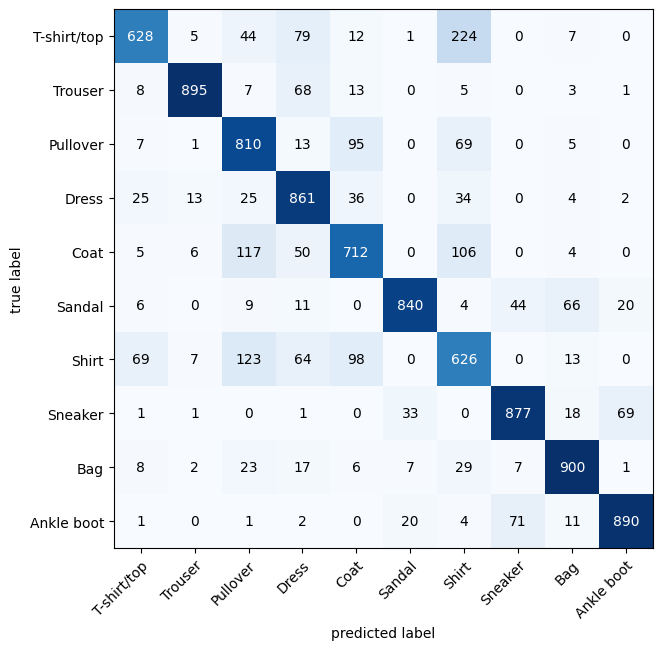

In [84]:
# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10, 7)
)

## 11. Save and load best performing model

In [86]:
from pathlib import Path

# Create model dictory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [87]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.3127,  0.3911, -0.4196],
                        [ 0.1556,  0.1815,  0.0878],
                        [-0.4420,  0.1430,  0.3166]]],
              
              
                      [[[-0.3738,  0.4791, -0.1338],
                        [ 0.2597,  0.4008,  0.0667],
                        [-0.1557,  0.3132,  0.0871]]],
              
              
                      [[[-0.3652, -0.0339, -0.0384],
                        [-0.6494, -0.6025,  0.2116],
                        [-0.8162, -0.6622, -0.1217]]],
              
              
                      [[[-0.7466, -0.8917, -0.7278],
                        [ 0.2914, -0.5231,  0.2517],
                        [ 0.2942, -0.0444,  0.3574]]],
              
              
                      [[[ 0.0132,  0.3515, -0.1108],
                        [-0.2418,  0.2368, -0.2215],
                        [-0.0970,  0.3388,  0.1292]]],
              
              
      

In [88]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [90]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [91]:
# 跟原本的比較:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [92]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-02)

tensor(True)

## Exercises

* See here for exercises and extra-curriculum: https://www.learnpytorch.io/03_pytorch_computer_vision/#exercises
